In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm.keras import TqdmCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
import glob 
import cv2 as cv
import pandas as pd
from random import randint

In [4]:
IMG_SIZE = (540 ,800)
NUM_LANDMARKS = 2
TRAIN_SPLIT = .8

UNET_DEPTH = 4
LEARNING_RATE = 0.01
EPOCHS = 10
BATCH_SIZE = 2


In [93]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'images'

In [5]:
images = glob.glob('images/*[!_mask].png')
cv.imread(images[0]).shape

(540, 800, 3)

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [59]:
data_landmark = pd.read_csv('role_challenge_dataset_ground_truth.csv')

In [62]:
data_landmark.head()

,image_name,ofd_1_x,ofd_1_y,ofd_2_x,ofd_2_y,bpd_1_x,bpd_1_y,bpd_2_x,bpd_2_y
0,000_HC.png,361,12,339,530,481,16,664,318
1,001_HC.png,441,331,368,308,297,247,534,142
2,002_HC.png,318,374,154,406,481,158,558,215
3,003_HC.png,424,105,407,462,305,349,547,363
4,004_HC.png,300,277,611,534,53,452,494,308


In [9]:
fnames = glob.glob('images/*[!_mask].png')
print(fnames[:3])
len(fnames)

['images/189_HC.png', 'images/108_HC.png', 'images/331_HC.png']


622

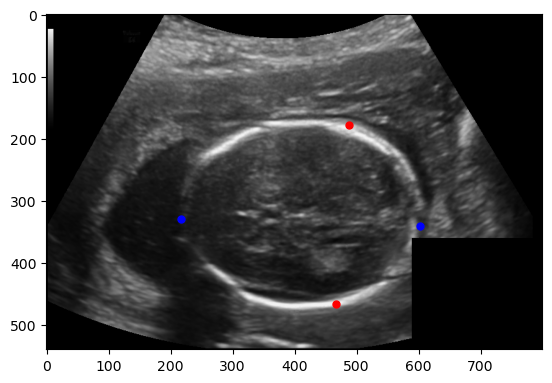

In [10]:
index = 61

dataHC = data_landmark[data_landmark["image_name"]==f"{fnames[index][7:]}"]
img_f = fnames[index]
img = cv.imread(img_f)

plt.scatter(dataHC["ofd_1_x"] ,dataHC["ofd_1_y"] , s=100, c='red', marker='.')
plt.scatter(dataHC["ofd_2_y"] ,dataHC["ofd_2_y"], s=100, c='red', marker='.')

plt.scatter(dataHC["bpd_1_x"] ,dataHC["bpd_1_y"] , s=100, c='blue', marker='.')
plt.scatter(dataHC["bpd_2_x"] ,dataHC["bpd_2_y"], s=100, c='blue', marker='.')

plt.imshow(img )

In [101]:
import pickle

with open("img_data", "rb") as fp:   #Pickling
    img_data = pickle.load(fp)
    
with open("landmark_data", "rb") as fp:   #Pickling
    landmark_data = pickle.load(fp)    

In [100]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((559, 1), (63, 1), (559, 9), (63, 9))

In [109]:
X_train_reshaped = np.squeeze(X_train, axis=1)
X_train_reshaped

label
192    [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
376    [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
103    [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
133    [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
159    [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
                             ...                        
251    [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
126    [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
11     [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
417    [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
336    [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
Name: image data, Length: 559, dtype: object

In [105]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 8, validation_data = (X_test, Y_test), verbose = 1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).